In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.io import loadmat
import matplotlib.pyplot as plt
import h5py

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load the CSV file
file_path = '/kaggle/input/overpass-satellite/combined_table.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Display the first few rows to verify if the data was loaded correctly
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/overpass-satellite/combined_table.csv'

In [ ]:
# Select only the desired columns
new_data = data[['Target', 'StartTime', 'EndTime', 'Duration']]

# Display the first few rows of the new dataset
print(new_data.head())

# Save the new dataset to a new CSV file
new_path = 'new_dataset.csv'  # Name of the new CSV file
new_data.to_csv(new_path, index=False)


   Target             StartTime               EndTime  Duration
0  HAWAII  01-May-2023 06:03:00  01-May-2023 06:16:00       780
1  HAWAII  01-May-2023 07:44:00  01-May-2023 07:54:00       600
2  HAWAII  01-May-2023 18:24:00  01-May-2023 18:37:00       780
3  HAWAII  01-May-2023 20:04:00  01-May-2023 20:15:00       660
4  HAWAII  02-May-2023 05:30:00  02-May-2023 05:42:00       720


In [ ]:
new_data


,Target,StartTime,EndTime,Duration
0,HAWAII,01-May-2023 06:03:00,01-May-2023 06:16:00,780
1,HAWAII,01-May-2023 07:44:00,01-May-2023 07:54:00,600
2,HAWAII,01-May-2023 18:24:00,01-May-2023 18:37:00,780
3,HAWAII,01-May-2023 20:04:00,01-May-2023 20:15:00,660
4,HAWAII,02-May-2023 05:30:00,02-May-2023 05:42:00,720
...,...,...,...,...
6431,SYDNEY,29-Jul-2023 10:54:00,29-Jul-2023 11:08:00,840
6432,SYDNEY,29-Jul-2023 12:36:00,29-Jul-2023 12:41:00,300
6433,SYDNEY,29-Jul-2023 20:28:00,29-Jul-2023 20:40:00,720
6434,SYDNEY,29-Jul-2023 22:06:00,29-Jul-2023 22:20:00,840


In [ ]:
# # Load the dataset with the specified date format
# file_path = '/kaggle/working/new_dataset.csv'  # Replace with your new dataset file path
# date_parser = lambda x: pd.to_datetime(x, format='%d-%b-%Y %H:%M:%S', errors='coerce')
# data = pd.read_csv(file_path, parse_dates=['StartTime', 'EndTime'], date_parser=date_parser)

# # Group data by 'Target' and find the smallest and largest time intervals
# grouped = data.groupby('Target')
# for name, group in grouped:
#     intervals = group['EndTime'] - group['StartTime']
#     smallest_interval = intervals.min()
#     largest_interval = intervals.max()
    
#     print(f"For {name}:")
#     print(f"Smallest interval: {smallest_interval}")
#     print(f"Largest interval: {largest_interval}")

/tmp/ipykernel_47/2030485925.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(file_path, parse_dates=['StartTime', 'EndTime'], date_parser=date_parser)


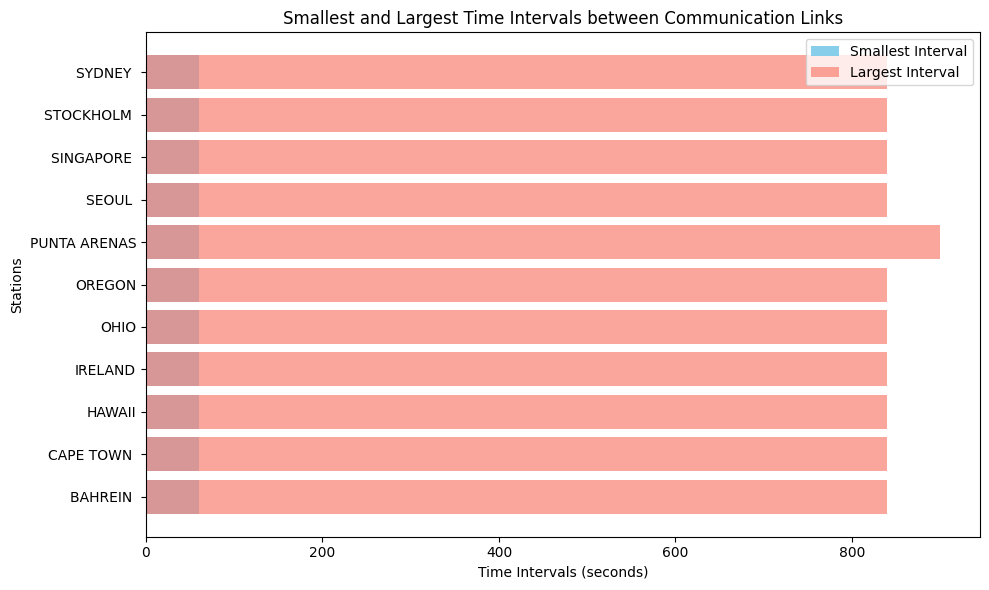

In [ ]:
# Load the dataset with the specified date format
file_path = '/kaggle/working/new_dataset.csv'  # Replace with your new dataset file path

date_parser = lambda x: pd.to_datetime(x, format='%d-%b-%Y %H:%M:%S', errors='coerce')
data = pd.read_csv(file_path, parse_dates=['StartTime', 'EndTime'], date_parser=date_parser)

# Group data by 'Target' and find the smallest and largest time intervals in seconds
grouped = data.groupby('Target')
stations = []
smallest_intervals = []
largest_intervals = []

for name, group in grouped:
    intervals = (group['EndTime'] - group['StartTime']).dt.total_seconds()
    smallest_interval = intervals.min()
    largest_interval = intervals.max()
    
    stations.append(name)
    smallest_intervals.append(smallest_interval)
    largest_intervals.append(largest_interval)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(stations, smallest_intervals, label='Smallest Interval', color='skyblue')
plt.barh(stations, largest_intervals, label='Largest Interval', color='salmon', alpha=0.7)
plt.xlabel('Time Intervals (seconds)')
plt.ylabel('Stations')
plt.title('Smallest and Largest Time Intervals between Communication Links')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

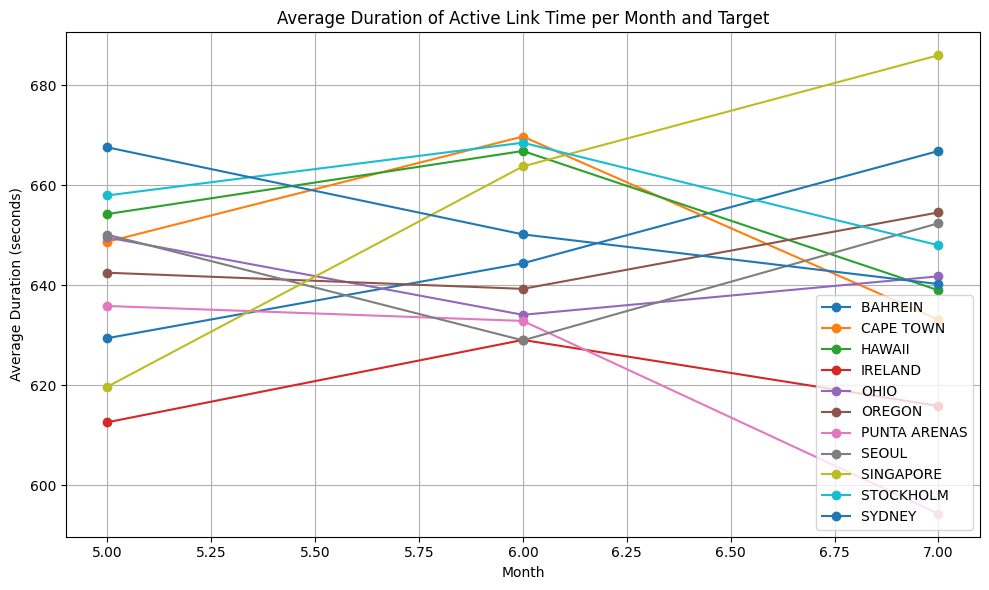

In [ ]:
# Create a 'Month' column to represent the month for each record
data['Month'] = data['StartTime'].dt.month

# Calculate time intervals in seconds and group by month and target
data['DurationSeconds'] = (data['EndTime'] - data['StartTime']).dt.total_seconds()
grouped = data.groupby(['Target', 'Month'])['DurationSeconds'].mean().reset_index()

# Plotting the average active link time for each month and target
plt.figure(figsize=(10, 6))
for target, group_data in grouped.groupby('Target'):
    plt.plot(group_data['Month'], group_data['DurationSeconds'], marker='o', label=target)

plt.xlabel('Month')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Active Link Time per Month and Target')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

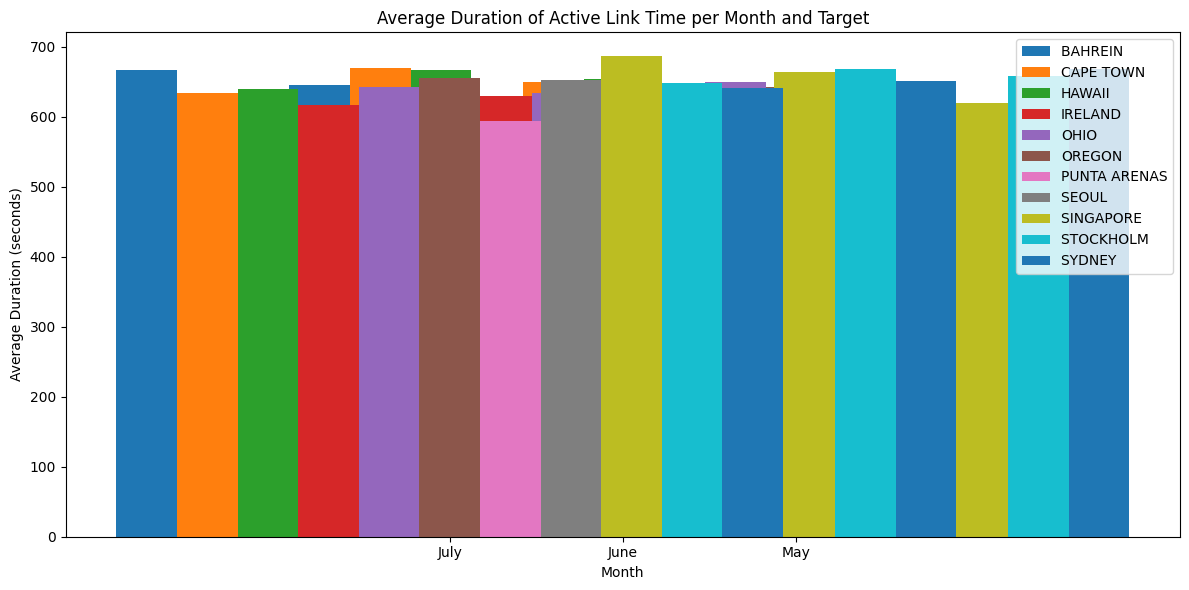

In [ ]:
import calendar
# Create a 'Month' column to represent the month for each record and convert month number to month name
data['Month'] = data['StartTime'].dt.month.apply(lambda x: calendar.month_name[x])

# Calculate time intervals in seconds and group by month and target
data['DurationSeconds'] = (data['EndTime'] - data['StartTime']).dt.total_seconds()
grouped = data.groupby(['Target', 'Month'])['DurationSeconds'].mean().reset_index()

# Plotting the average active link time for each month and target using a bar chart
plt.figure(figsize=(12, 6))
targets = grouped['Target'].unique()
bar_width = 0.35
index = list(range(len(grouped['Month'].unique())))

for i, target in enumerate(targets):
    subset = grouped[grouped['Target'] == target]
    plt.bar([x + bar_width * i for x in index], subset['DurationSeconds'], bar_width, label=target)

plt.xlabel('Month')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Active Link Time per Month and Target')
plt.xticks([r + bar_width * (len(targets) - 1) / 2 for r in index], grouped['Month'].unique())
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

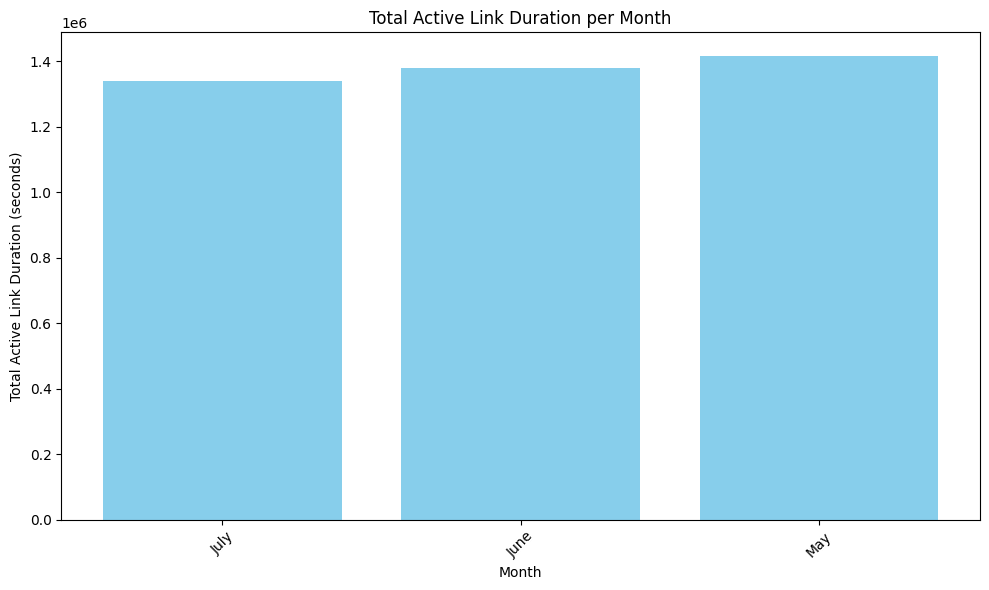

In [ ]:
# Criar uma coluna 'Month' para representar o mês de cada registro e converter o número do mês para o nome do mês
data['Month'] = data['StartTime'].dt.month.apply(lambda x: calendar.month_name[x])

# Calcular os intervalos de tempo em segundos e somar as durações dos links ativos para cada mês
data['DurationSeconds'] = (data['EndTime'] - data['StartTime']).dt.total_seconds()
monthly_totals = data.groupby('Month')['DurationSeconds'].sum()

# Criar um gráfico de barras para mostrar a soma total dos links ativos por mês
plt.figure(figsize=(10, 6))
plt.bar(monthly_totals.index, monthly_totals.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Active Link Duration (seconds)')
plt.title('Total Active Link Duration per Month')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

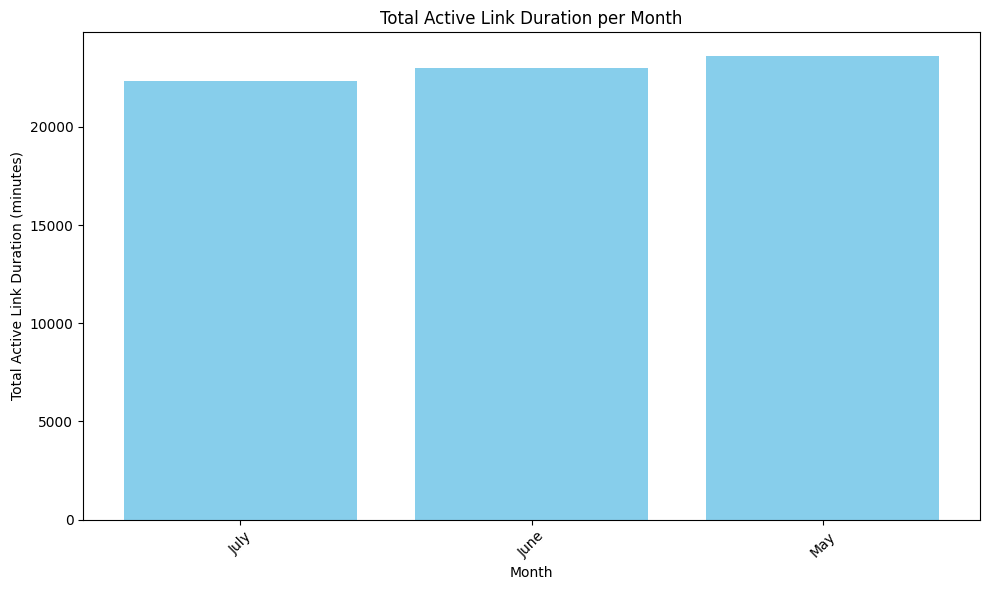

In [ ]:
# Criar uma coluna 'Month' para representar o mês de cada registro e converter o número do mês para o nome do mês
data['Month'] = data['StartTime'].dt.month.apply(lambda x: calendar.month_name[x])

# Calcular os intervalos de tempo em minutos e somar as durações dos links ativos para cada mês
data['DurationMinutes'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 60
monthly_totals = data.groupby('Month')['DurationMinutes'].sum()

# Criar um gráfico de barras para mostrar a soma total dos links ativos por mês (em minutos)
plt.figure(figsize=(10, 6))
plt.bar(monthly_totals.index, monthly_totals.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Active Link Duration (minutes)')
plt.title('Total Active Link Duration per Month')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

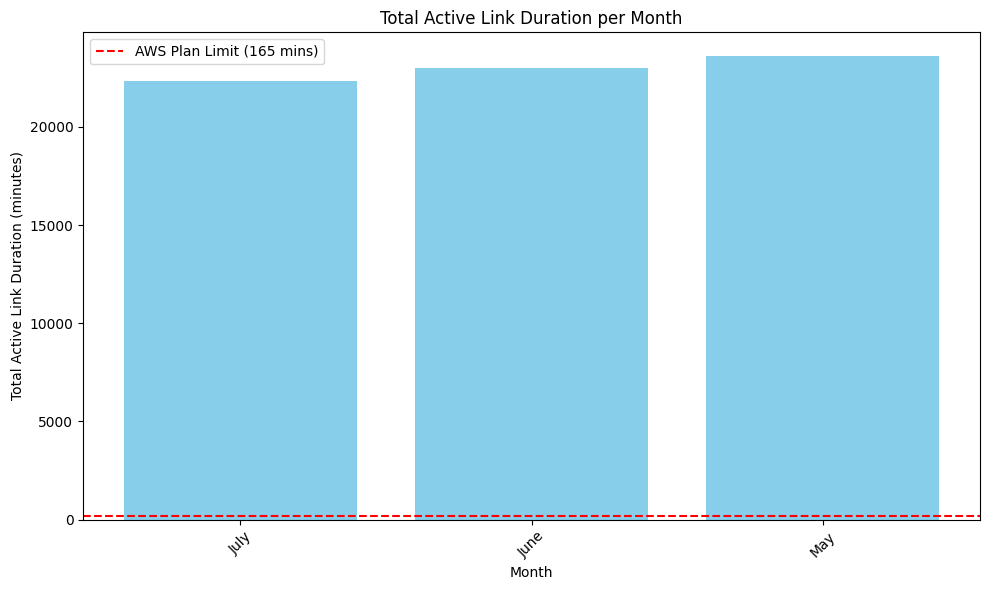

In [ ]:
# Criar uma coluna 'Month' para representar o mês de cada registro e converter o número do mês para o nome do mês
data['Month'] = data['StartTime'].dt.month.apply(lambda x: calendar.month_name[x])

# Calcular os intervalos de tempo em minutos e somar as durações dos links ativos para cada mês
data['DurationMinutes'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 60
monthly_totals = data.groupby('Month')['DurationMinutes'].sum()

# Criar um gráfico de barras para mostrar a soma total dos links ativos por mês (em minutos)
plt.figure(figsize=(10, 6))
plt.bar(monthly_totals.index, monthly_totals.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Active Link Duration (minutes)')
plt.title('Total Active Link Duration per Month')

# Adicionar uma linha para o tempo limite do Plano AWS (165 minutos)
plt.axhline(y=165, color='red', linestyle='--', label='AWS Plan Limit (165 mins)')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()
#Este código adiciona uma linha pontilhada vermelha no valor de 165 minutos e inclui uma legenda explicativa indicando que é o limite do Plano AWS. Isso será exibido no gráfico de barras das durações totais de links ativos por mês em minutos.







In [ ]:
monthly_totals

Month
July    22317.0
June    22978.0
May     23632.0
Name: DurationMinutes, dtype: float64

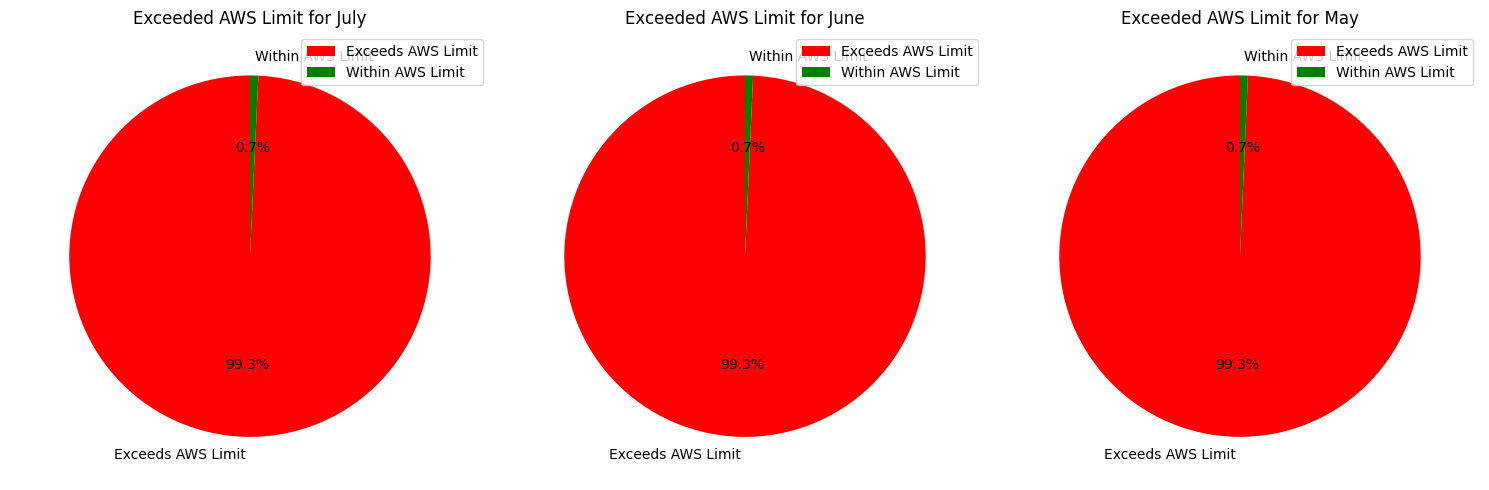

In [ ]:
# Calcular a quantidade que excede o limite do Plano AWS (165 minutos)
aws_limit = 165
exceeds_aws = {month: total - aws_limit if total > aws_limit else 0 for month, total in monthly_totals.items()}

# Cores para as partes excedidas e não excedidas
colors = ['red', 'green']

# Criar três gráficos de pizza lado a lado, um para cada mês
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (month, total) in enumerate(monthly_totals.items()):
    ax = axs[i]
    sizes = [exceeds_aws[month], total - exceeds_aws[month]]
    labels = ['Exceeds AWS Limit', 'Within AWS Limit']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Exceeded AWS Limit for {month}')
    ax.legend(labels, loc='upper right')  # Adiciona a legenda
    ax.axis('equal')  # Deixa o gráfico de pizza circular

plt.tight_layout()
plt.show()

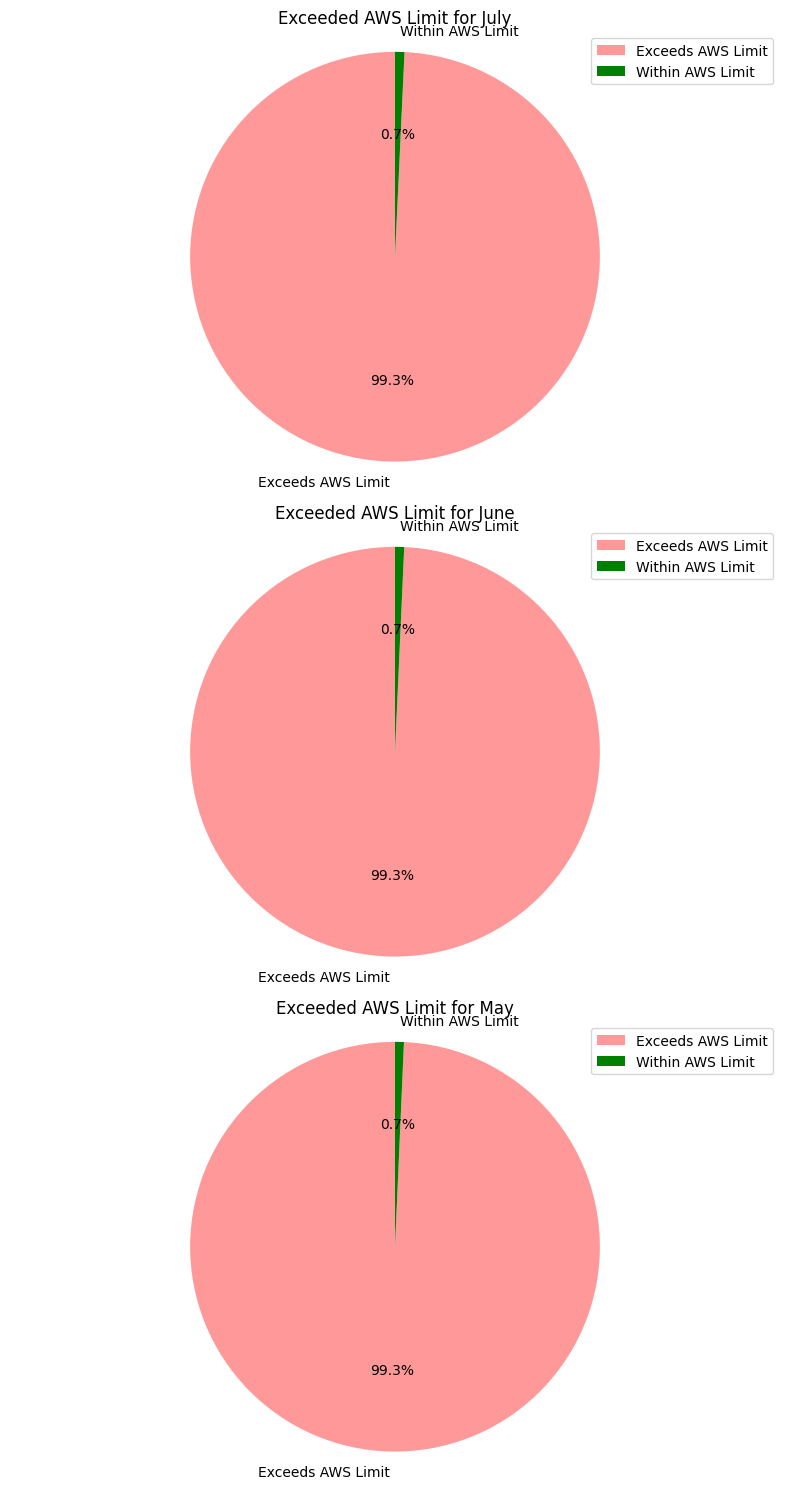

In [ ]:
# Calcular a quantidade que excede o limite do Plano AWS (165 minutos)
aws_limit = 165
exceeds_aws = {month: total - aws_limit if total > aws_limit else 0 for month, total in monthly_totals.items()}

# Cores para as partes excedidas e não excedidas
colors = ['#FF9999', 'green']

# Criar três gráficos de pizza um abaixo do outro, um para cada mês
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

for i, (month, total) in enumerate(monthly_totals.items()):
    ax = axs[i]
    sizes = [exceeds_aws[month], total - exceeds_aws[month]]
    labels = ['Exceeds AWS Limit', 'Within AWS Limit']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Exceeded AWS Limit for {month}')
    ax.legend(labels, loc='upper right')  # Adiciona a legenda
    ax.axis('equal')  # Deixa o gráfico de pizza circular

plt.tight_layout()
# Save the plot as a PDF file
plt.savefig('aws_limit_pie_charts.pdf', bbox_inches='tight', format='pdf')
plt.show()


In [ ]:
# Criar uma coluna 'Month' para representar o mês de cada registro
data['Month'] = data['StartTime'].dt.month

# Calcular os intervalos de tempo em segundos e agrupar por mês e estação
data['DurationSeconds'] = (data['EndTime'] - data['StartTime']).dt.total_seconds()
grouped = data.groupby(['Target', 'Month'])['DurationSeconds'].mean().reset_index()

# Mostrar a média dos intervalos de tempo de link ativo para cada mês e estação
print(grouped)

          Target  Month  DurationSeconds
0       BAHREIN       5       629.426752
1       BAHREIN       6       644.400000
2       BAHREIN       7       666.857143
3     CAPE TOWN       5       648.705882
4     CAPE TOWN       6       669.750000
5     CAPE TOWN       7       633.128834
6         HAWAII      5       654.246575
7         HAWAII      6       666.857143
8         HAWAII      7       639.000000
9        IRELAND      5       612.608696
10       IRELAND      6       629.076923
11       IRELAND      7       615.875486
12          OHIO      5       649.565217
13          OHIO      6       634.098361
14          OHIO      7       641.797753
15        OREGON      5       642.512563
16        OREGON      6       639.289340
17        OREGON      7       654.574468
18  PUNTA ARENAS      5       635.864662
19  PUNTA ARENAS      6       632.873563
20  PUNTA ARENAS      7       594.306569
21        SEOUL       5       650.113636
22        SEOUL       6       628.988764
23        SEOUL 

In [ ]:

# Ordenar os dados pelo StartTime para facilitar a identificação dos intervalos
data.sort_values(by='StartTime', inplace=True)

# Calcular a diferença entre os tempos consecutivos
data['TimeDiff'] = data['StartTime'].diff()

# Encontrar o menor e o maior intervalo de tempo entre os links ativos
min_interval = data['TimeDiff'].min()
max_interval = data['TimeDiff'].max()

print(f"Menor intervalo de tempo entre links ativos: {min_interval}")
print(f"Maior intervalo de tempo entre links ativos: {max_interval}")


Menor intervalo de tempo entre links ativos: 0 days 00:00:00
Maior intervalo de tempo entre links ativos: 0 days 01:10:00


In [ ]:
# Encontrar o menor e o maior valor de tempo na coluna "Duration"
min_duration = data['Duration'].min()
max_duration = data['Duration'].max()

print(f"Menor valor de tempo na coluna 'Duration': {min_duration}")
print(f"Maior valor de tempo na coluna 'Duration': {max_duration}")

Menor valor de tempo na coluna 'Duration': 60
Maior valor de tempo na coluna 'Duration': 900


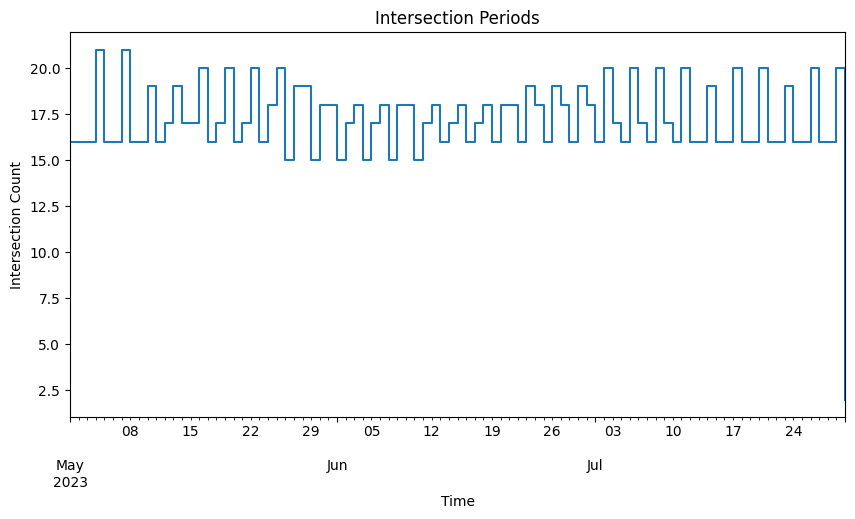

In [ ]:
# Sort data by StartTime for easier intersection identification
data.sort_values(by='StartTime', inplace=True)

# Find intersections in time intervals
intersections = []
current_end = None

for index, row in data.iterrows():
    if current_end is None:
        current_end = row['EndTime']
        continue
    
    if row['StartTime'] < current_end:
        intersections.append((row['StartTime'], min(current_end, row['EndTime'])))
    else:
        current_end = row['EndTime']

# Create a time series with values of 1 in the intersection periods
intersection_times = pd.Series(1, index=pd.to_datetime([start for start, end in intersections]))

# Plot a line chart to represent the intersection periods
plt.figure(figsize=(10, 5))
intersection_times.resample('D').sum().plot(kind='line', drawstyle='steps-post')
plt.title('Intersection Periods')
plt.xlabel('Time')
plt.ylabel('Intersection Count')
plt.show()

In [ ]:
# Ordenar os dados pelo StartTime para facilitar a identificação das interseções
data.sort_values(by='StartTime', inplace=True)

# Criar um dicionário para rastrear os links ativos em cada momento
active_links = {}

# Identificar os períodos de interseção para cada estação
for index, row in data.iterrows():
    for target in data['Target'].unique():
        if target not in active_links:
            active_links[target] = 0
        
        if row['Target'] == target:
            active_links[target] += 1

# Contar quantas estações tiveram link ativo ao mesmo tempo com o satélite
same_time_links = sum(1 for count in active_links.values() if count > 1)

print(f"Número de estações com link ativo ao mesmo tempo com o satélite: {same_time_links}")

Número de estações com link ativo ao mesmo tempo com o satélite: 11


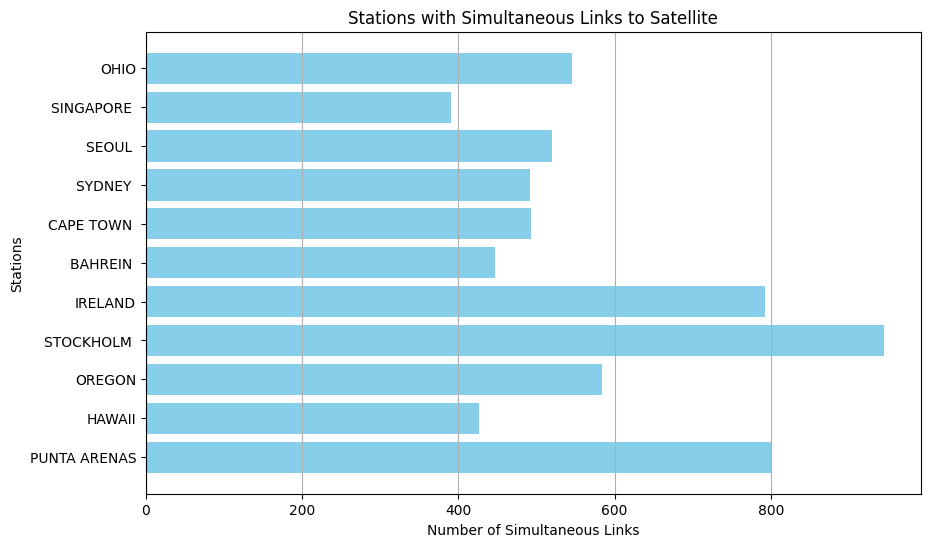

In [ ]:
# Sort data by StartTime for easier intersection identification
data.sort_values(by='StartTime', inplace=True)

# Create a dictionary to track active links at each moment
active_links = {}

# Identify intersection periods for each station
for index, row in data.iterrows():
    for target in data['Target'].unique():
        if target not in active_links:
            active_links[target] = 0
        
        if row['Target'] == target:
            active_links[target] += 1

# Count how many stations had active links simultaneously with the satellite
same_time_links = {target: count for target, count in active_links.items() if count > 1}

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(same_time_links.keys()), list(same_time_links.values()), color='skyblue')
plt.xlabel('Number of Simultaneous Links')
plt.ylabel('Stations')
plt.title('Stations with Simultaneous Links to Satellite')
plt.grid(axis='x')

plt.show()

In [ ]:
# # Ordenar os dados pelo StartTime para facilitar a análise
# data.sort_values(by='StartTime', inplace=True)

# # Encontrar os momentos em que mais de uma estação teve link ativo simultaneamente
# simultaneous_links = data[data.duplicated(subset='StartTime', keep=False)]

# # Criar um gráfico de dispersão
# plt.figure(figsize=(10, 6))

# # Iterar sobre os grupos de links simultâneos para plotar cada grupo com uma cor diferente
# for index, group in simultaneous_links.groupby('StartTime'):
#     plt.scatter(group['Target'], group['Duration'], label=index.strftime('%Y-%m-%d %H:%M:%S'))

# plt.xlabel('Estações')
# plt.ylabel('Duração do Link Ativo (segundos)')
# plt.title('Duração do Link Ativo para Estações com Links Simultâneos')
# plt.legend(title='Tempo de Início do Link', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

TypeError: text() missing 1 required positional argument: 's'

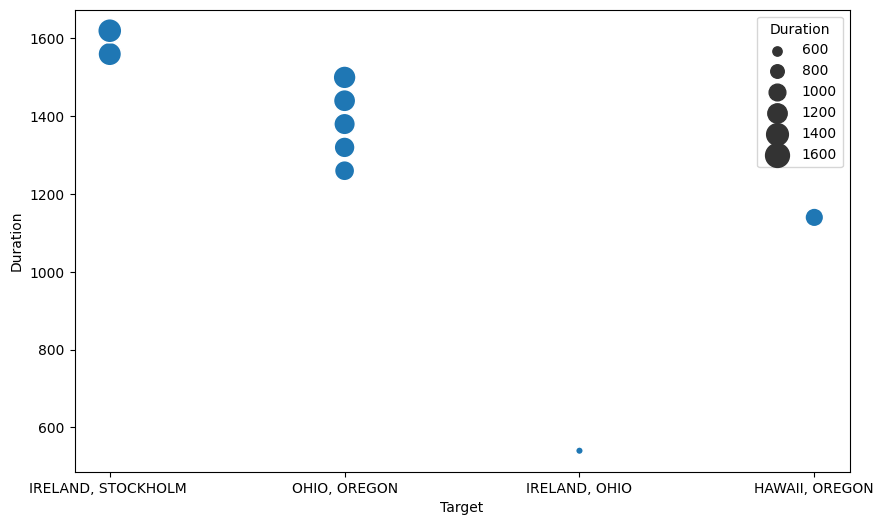

In [ ]:
import seaborn as sns

data.sort_values(by='StartTime', inplace=True)

# Find moments when more than one station had a simultaneous active link
simultaneous_links = data[data.duplicated(subset='StartTime', keep=False)]

# Aggregate the data to count the number of simultaneous links and calculate total duration
grouped = simultaneous_links.groupby('StartTime').agg({
    'Target': lambda x: ', '.join(sorted(x.unique())),  # Concatenate station names
    'Duration': 'sum'  # Sum durations
}).reset_index()

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Target', y='Duration', data=grouped, size='Duration', sizes=(30, 300))

# Add annotations for station names
for idx, row in grouped.iterrows():
    plt.text(row['Target'], row['Duration'], ha='right')

plt.xlabel('Stations with Simultaneous Active Links')
plt.ylabel('Duration of Intersection (seconds)')
plt.title('Intersection of Simultaneous Active Links by Stations')

plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()